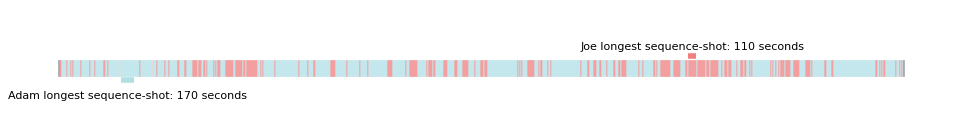

In [11]:
# Quick example for plotting results from interview-meter

import matplotlib.pyplot as plt
import random
import numpy as np

# We open an example CSV generated by interview-meter and convert it back to a Numpy Array
b = np.loadtxt('./examples/joe_rogan/Joe Rogan Experience #1436 - Adam Curry.csv', dtype=np.int32)

# We set the scenes, colors and positions
scenes = ['cover','both','Adam', 'Joe']
colors = ['lightgray', 'dimgray', 'powderblue', 'lightcoral']
position = [0.8,0.9,0.99, 1.01]
position_text = [0.79, 0.89,0.975, 1.015]

# We only analize certain scenes
analyze_scenes = ['Adam','Joe']

# Indicator variables
start_longest_seq = [None] * len(scenes)
stop_longest_seq =  [None] * len(scenes)
length_longest_seq = [None] * len(scenes)

# Calculate indicators
for item in analyze_scenes:
    # Get start, stop index pairs for islands/seq. of 1s
    idx = scenes.index(item)
    idx_pairs = np.where(np.diff(np.hstack(([False],b==idx,[False]))))[0].reshape(-1,2)
    start_longest_seq[idx] = idx_pairs[np.diff(idx_pairs,axis=1).argmax(),0]
    stop_longest_seq[idx] = idx_pairs[np.diff(idx_pairs,axis=1).argmax(),1]
    length_longest_seq[idx] = stop_longest_seq[idx] - start_longest_seq[idx]

# Prepare the plot
f, ax = plt.subplots(num=None, figsize=(15, 2), dpi=80)
ax.set_ylim(0.95,1.05)
plt.axis('off')

# Plot the horizontal timeline, in wich every second is a vertical line. This gives the look of a continuous bar
for x in range(0, len(b)):
    color = colors[b[x]]
    plt.hlines(1, x, x + 1, colors=color, lw=15)

# For each analized scene, print out the longest sequence-shot.
for item in analyze_scenes:
    idx = scenes.index(item)
    hint_text = scenes[idx] + ' longest sequence-shot: '
    plt.hlines(position[idx], start_longest_seq[idx], stop_longest_seq[idx], colors=colors[idx], lw=5)
    plt.text(start_longest_seq[idx]+(stop_longest_seq[idx]-start_longest_seq[idx])/2, position_text[idx], hint_text + str(length_longest_seq[idx]) + ' seconds', ha='center')

plt.show()

